# lab2 Logisitic Regression

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as op

## 1. Load Data

In [2]:
data = pd.read_csv('ex2data1.txt')
X = np.array(data.iloc[:,0:2])
y = np.array(data.iloc[:,2])
print('X.shape = ' + str(X.shape))
print('y.shape = ' + str(y.shape))

X.shape = (99, 2)
y.shape = (99,)


In [3]:
def plotData(X, y):
    k1 = (y==1)
    k2 = (y==0)
    plt.scatter(X[k1,0], X[k1,1], c='r',marker='+')
    plt.scatter(X[k2,0], X[k2,1], c='b',marker='o')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend(['Admitted', 'Not admitted'])

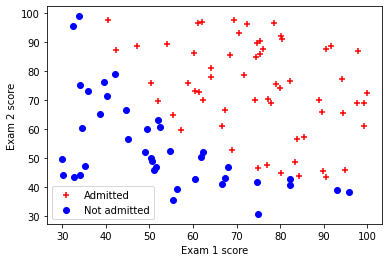

In [4]:
plotData(X, y)
plt.show()

In [5]:
# 在X左侧添加全1的列
m = X.shape[0]
n = X.shape[1]
X = np.hstack((np.ones((m,1)), X))
print('X.shape = ' + str(X.shape))
ini_theta = np.zeros((n+1, 1))

X.shape = (99, 3)


## 2. Cost and Gradient
$$
g(z)=\frac{1}{1+e^{-z}} 
$$
$$
J(\theta)=\frac{1}{m}\sum_{i=1}^{m}[-y^{(i)}log(h_\theta(x^{(i)}))-(1-y^{(i)})log(1-h_\theta(x^{(i)}))]
$$
$$
\frac{\partial J(\theta)}{\partial\theta_j}=\frac{1}{m}\sum_{i=1}^{m} [(h_\theta(x^{(i)})-y^{(i)})x^{(i)}_j]
$$

In [6]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))

In [7]:
def gradient(theta, X, y):
    '''compute gradient
    args:
        X - X.shape = (m,n)
        theta - theta.shape = (n,1)
        y - y.shape = (m,1)
    return:
        grade - the gradient
    '''
    m = X.shape[0]
    n = X.shape[1]
    theta = theta.reshape((n,1))    
    y = y.reshape((m,1))
    h = sigmoid(np.dot(X, theta))

    tmp = np.sum((h-y)*X, axis=0) / m
    grade = tmp.reshape(theta.shape)
    return grade

In [8]:
def costFunction(theta, X, y):
    '''compute cost
    args:
        X - X.shape = (m,n)
        theta - theta.shape = (n,1)
        y - y.shape = (m,1)
    return:
        J - the cost
    '''
    m = X.shape[0]
    n = X.shape[1]
    theta = theta.reshape((n,1))    
    y = y.reshape((m,1))
    h = sigmoid(np.dot(X, theta))

    term1 = y * np.log(h)
    term2 = (1-y) * np.log(1-h)
    J = sum(- term1 - term2) / m
    return J

In [9]:
grade = gradient(ini_theta, X, y)
cost= costFunction(ini_theta, X, y)
print('cost = ' + str(cost))
grade

cost = [0.69314718]


array([[ -0.10606061],
       [-12.30538878],
       [-11.77067239]])

In [10]:
test_theta = [[-24], [0.2], [0.2]]
test_theta = np.array(test_theta)
grade = gradient(test_theta, X, y)
cost = costFunction(test_theta, X, y)
print('cost = ' + str(cost))
grade

cost = [0.21844573]


array([[0.04144856],
       [2.52679301],
       [2.52623742]])

## 3. predict
这里使用scipy中的替代优化器

In [11]:
result = op.minimize(fun=costFunction, x0=ini_theta, args=(X, y), method='TNC', jac=gradient)
optimal_theta = result.x
optimal_theta

array([-24.86560598,   0.20334381,   0.19985072])

In [12]:
def plotDecisionBoundary(theta, X, y):
    '''绘制边界直线
    '''
    plotData(X[:,1:3], y)
    
    plot_x = np.array([np.min(X[:,1])-2, np.max(X[:,1])+2])
    # theta0 + theta1 * x1 + theta2 * x2 == 0
    # 代入sigmoid函数
    # g(z) = 1/2 是判断1和0的阈值
    plot_y = -1 / theta[2] * (theta[1]*plot_x + theta[0]) 
    plt.plot(plot_x, plot_y)

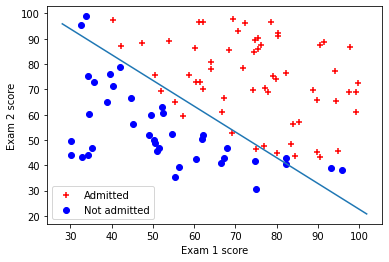

In [13]:
plotDecisionBoundary(optimal_theta, X, y)
plt.show()

In [14]:
def predict(theta, X):
    m = X.shape[0]
    pred = np.zeros((m,1))
    h = sigmoid(np.dot(X, theta))
    pred[h>=0.5] = 1
    return pred.flatten()

In [15]:
prob = np.array([1, 45, 85])
prob = sigmoid(np.dot(prob, optimal_theta))
prob

0.7811151916216723

In [16]:
# 计算准确率，这里的mean函数使用巧妙
p = predict(optimal_theta, X)
print('Train accuracy = {}%'.format(100 * np.mean(p==y)) )

Train accuracy = 88.88888888888889%
